In [425]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier

In [351]:
df = pd.read_csv('datasets/bank_customer_analytics.csv')

In [352]:
df.shape

(3000, 12)

In [353]:
df.head(10)

,CustomerID,Age,Gender,MaritalStatus,Income,Savings,CreditScore,LoanAmount,LoanStatus,AccountType,YearsWithBank,Churn
0,C0001,25.0,FEMALE,single,80000.0,15000.0,600.0,50000.0,approved,joint,NaN,no
1,C0002,35.0,male,single,40000.0,5000.0,700.0,40000.0,approved,joint,10.0,no
2,C0003,35.0,female,single,100000.0,20000.0,800.0,50000.0,defaulted,checking,10.0,no
3,C0004,45.0,male,married,80000.0,20000.0,750.0,30000.0,approved,checking,NaN,no
4,C0005,45.0,male,married,40000.0,25000.0,750.0,20000.0,rejected,checking,2.0,yes
5,C0006,35.0,male,married,100000.0,20000.0,750.0,20000.0,rejected,joint,5.0,no
6,C0007,35.0,male,single,60000.0,25000.0,800.0,20000.0,approved,savings,10.0,yes
7,C0008,35.0,female,single,60000.0,25000.0,700.0,20000.0,rejected,investment,10.0,no
8,C0009,55.0,FEMALE,single,80000.0,100000.0,650.0,30000.0,rejected,joint,1.0,no
9,C0010,45.0,male,single,60000.0,10000.0,NaN,50000.0,rejected,checking,10.0,yes


In [354]:
df.dtypes

CustomerID        object
Age              float64
Gender            object
MaritalStatus     object
Income           float64
Savings          float64
CreditScore      float64
LoanAmount       float64
LoanStatus        object
AccountType       object
YearsWithBank    float64
Churn             object
dtype: object

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     3000 non-null   object 
 1   Age            2838 non-null   float64
 2   Gender         3000 non-null   object 
 3   MaritalStatus  3000 non-null   object 
 4   Income         2865 non-null   float64
 5   Savings        2854 non-null   float64
 6   CreditScore    2857 non-null   float64
 7   LoanAmount     2867 non-null   float64
 8   LoanStatus     3000 non-null   object 
 9   AccountType    3000 non-null   object 
 10  YearsWithBank  2713 non-null   float64
 11  Churn          3000 non-null   object 
dtypes: float64(6), object(6)
memory usage: 281.4+ KB


In [357]:
df.describe()

,Age,Income,Savings,CreditScore,LoanAmount,YearsWithBank
count,2838.000000,2865.000000,2854.000000,2857.000000,2867.000000,2713.000000
mean,39.048626,68293.193717,21483.882270,694.662233,34080.920823,6.883155
std,9.816456,19997.850070,20893.054327,68.907793,9972.978607,5.907284
min,25.000000,40000.000000,5000.000000,600.000000,20000.000000,1.000000
25%,35.000000,60000.000000,10000.000000,650.000000,30000.000000,2.000000
50%,35.000000,60000.000000,15000.000000,700.000000,30000.000000,5.000000
75%,45.000000,80000.000000,20000.000000,750.000000,40000.000000,10.000000
max,55.000000,100000.000000,200000.000000,800.000000,50000.000000,100.000000


In [358]:
# Checking how many null values exists
df.isna().sum()

CustomerID         0
Age              162
Gender             0
MaritalStatus      0
Income           135
Savings          146
CreditScore      143
LoanAmount       133
LoanStatus         0
AccountType        0
YearsWithBank    287
Churn              0
dtype: int64

In [359]:
df.isna().sum()/df.shape[0]*100

CustomerID       0.000000
Age              5.400000
Gender           0.000000
MaritalStatus    0.000000
Income           4.500000
Savings          4.866667
CreditScore      4.766667
LoanAmount       4.433333
LoanStatus       0.000000
AccountType      0.000000
YearsWithBank    9.566667
Churn            0.000000
dtype: float64

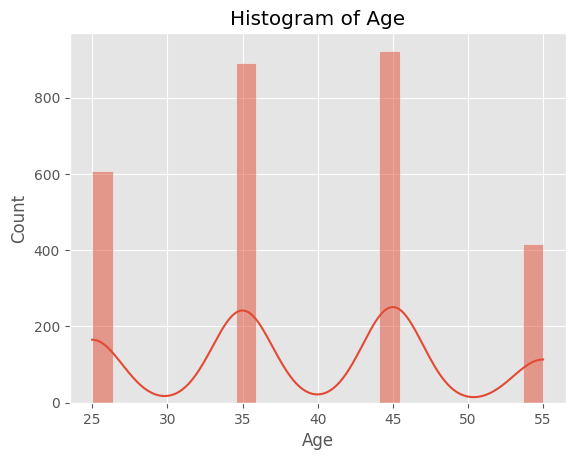

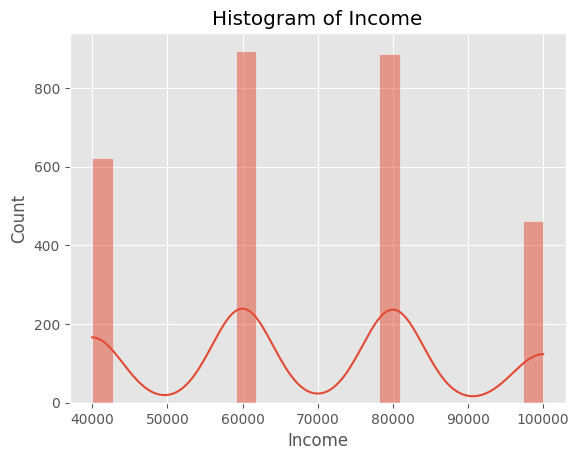

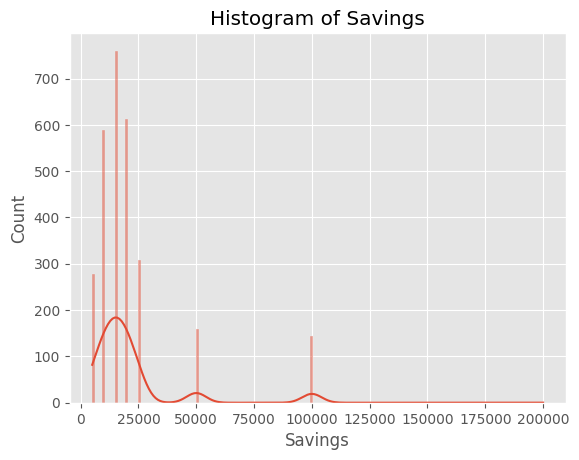

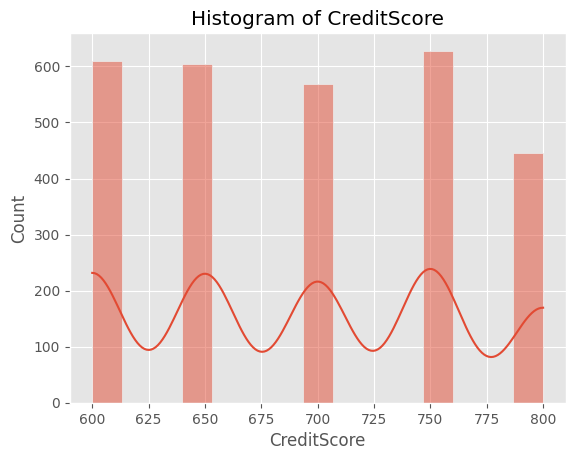

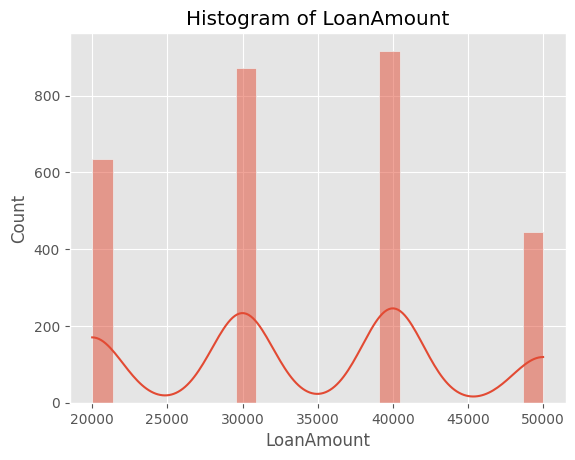

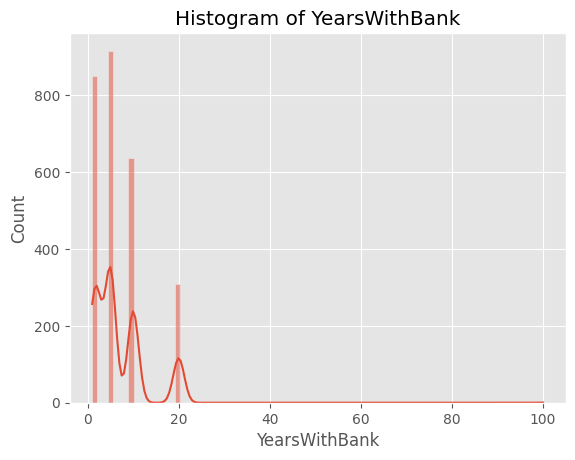

In [360]:
# histograms to understand the distrirbution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f"Histogram of {i}")
    plt.show()

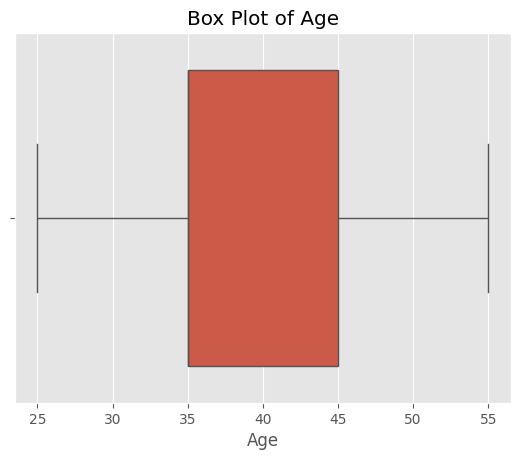

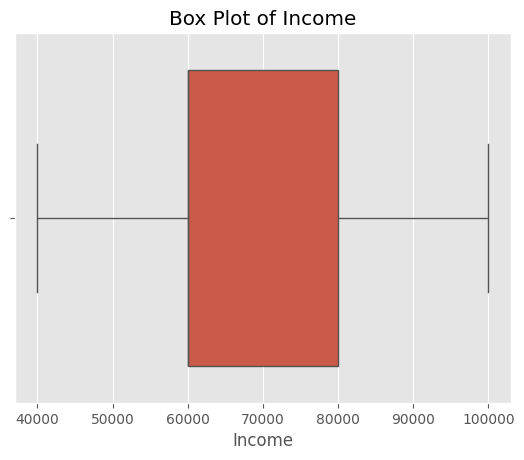

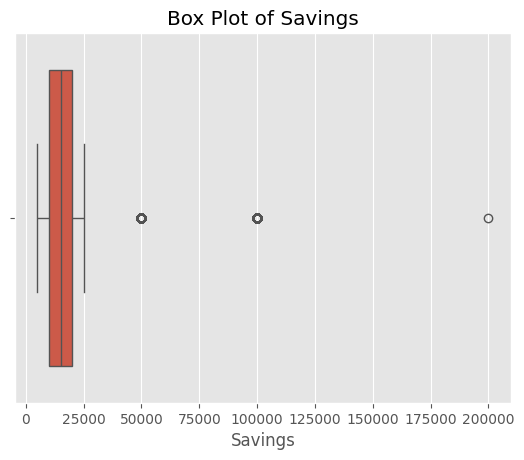

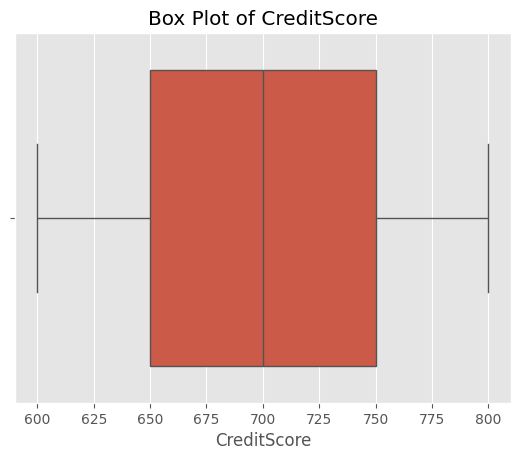

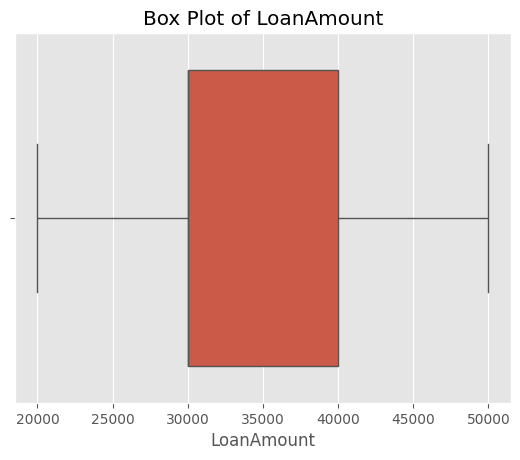

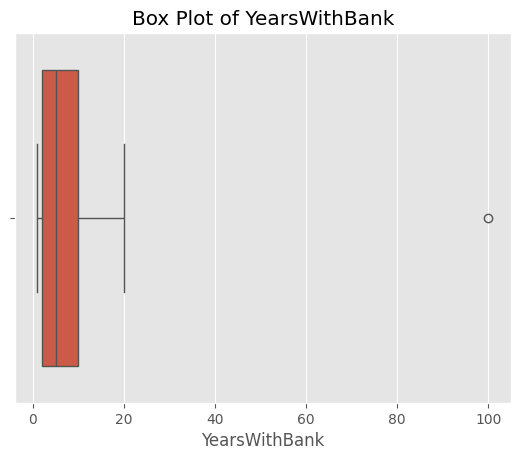

In [361]:
# boxplots to identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.title(f"Box Plot of {i}")
    plt.show()

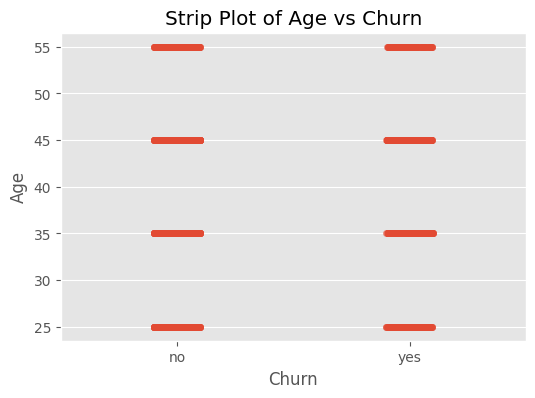

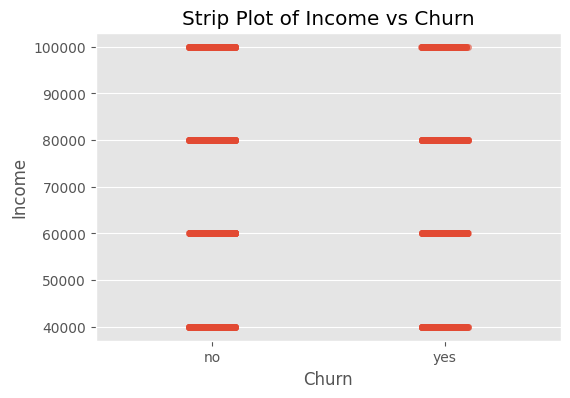

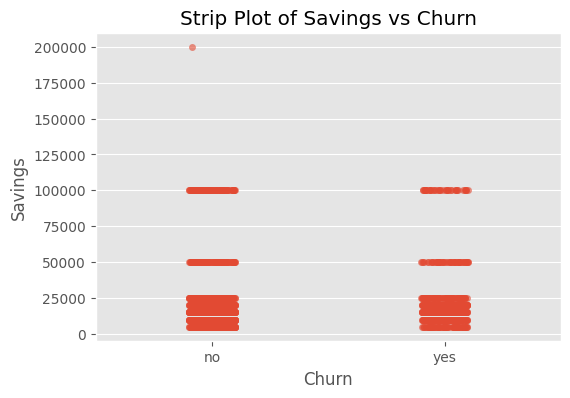

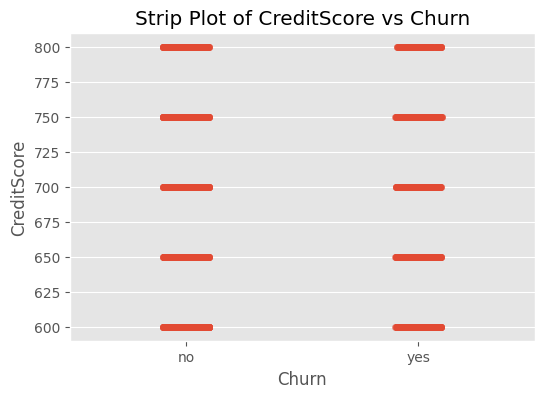

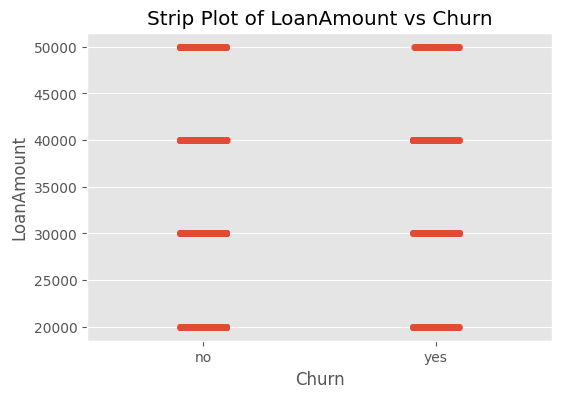

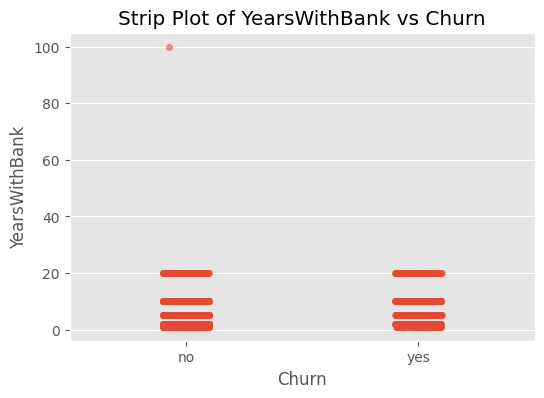

In [424]:
# strip plots to understand the relationship between numerical features and each value of Churn
for i in ['Age', 'Income', 'Savings', 'CreditScore', 'LoanAmount', 'YearsWithBank']:
    plt.figure(figsize=(6, 4))
    sns.stripplot(x=df['Churn'], y=df[i], jitter=True, alpha=0.6)
    plt.title(f"Strip Plot of {i} vs Churn")
    plt.xlabel("Churn")
    plt.show()

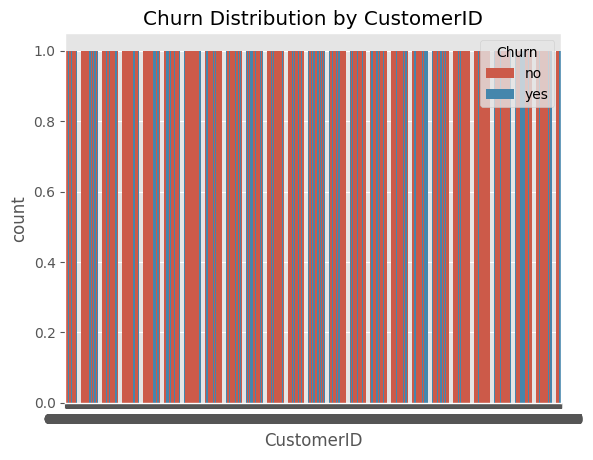

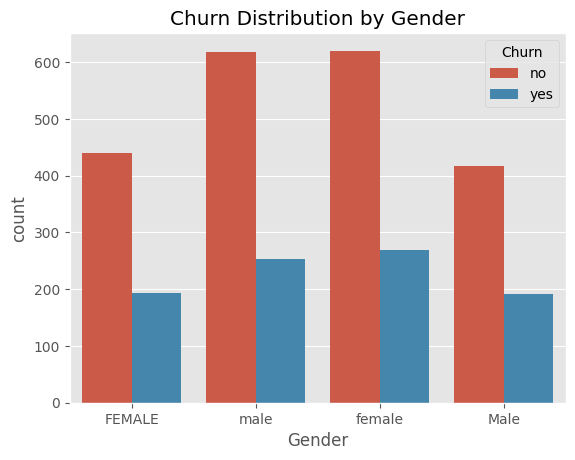

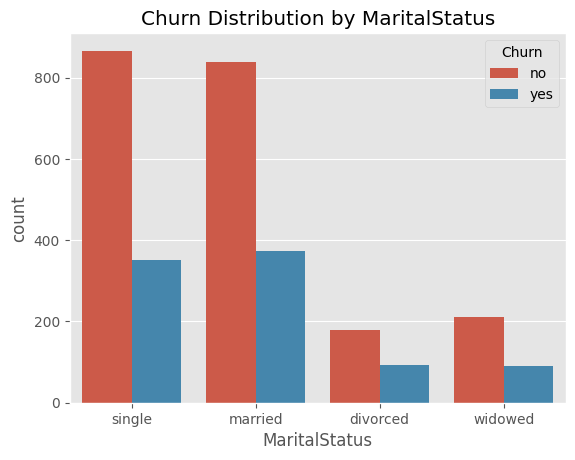

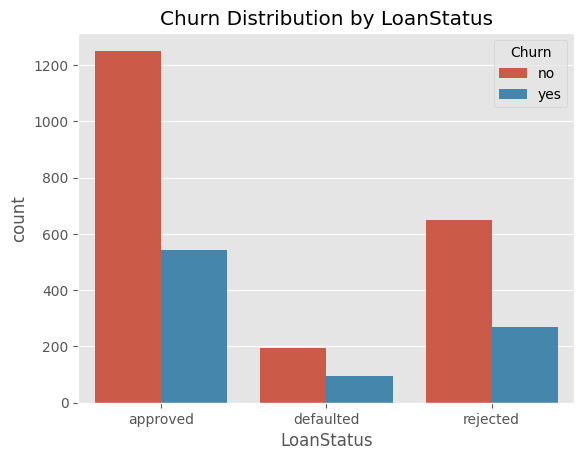

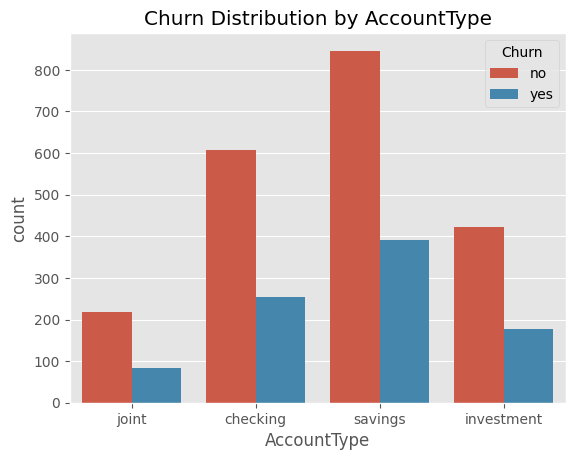

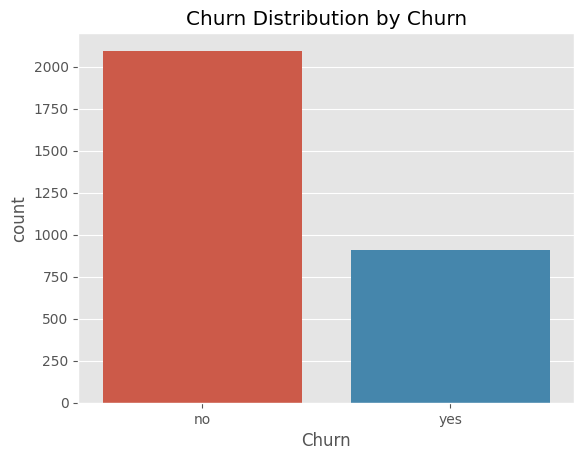

In [364]:
for i in df.select_dtypes(include='object').columns:
    sns.countplot(data=df, x=i, hue='Churn')
    plt.title(f"Churn Distribution by {i}")
    plt.show()

In [365]:
correlation_matrix = df[['Age', 'Income', 'Savings', 'CreditScore', 'LoanAmount', 'YearsWithBank']].dropna().corr()
correlation_matrix

,Age,Income,Savings,CreditScore,LoanAmount,YearsWithBank
Age,1.000000,0.017207,-0.022348,-0.018503,0.007779,0.018169
Income,0.017207,1.000000,-0.022263,0.008479,0.014049,0.015131
Savings,-0.022348,-0.022263,1.000000,-0.006274,-0.007172,0.049867
CreditScore,-0.018503,0.008479,-0.006274,1.000000,-0.027242,-0.021632
LoanAmount,0.007779,0.014049,-0.007172,-0.027242,1.000000,-0.047804
YearsWithBank,0.018169,0.015131,0.049867,-0.021632,-0.047804,1.000000


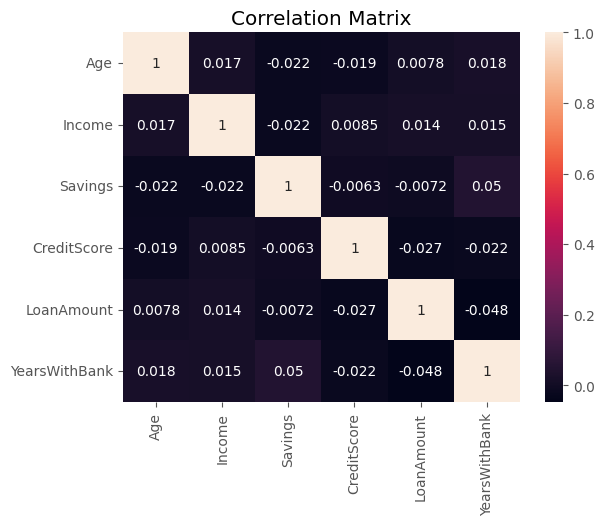

In [366]:
# correlation with heatmap to interpet the relation
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix")
plt.show()

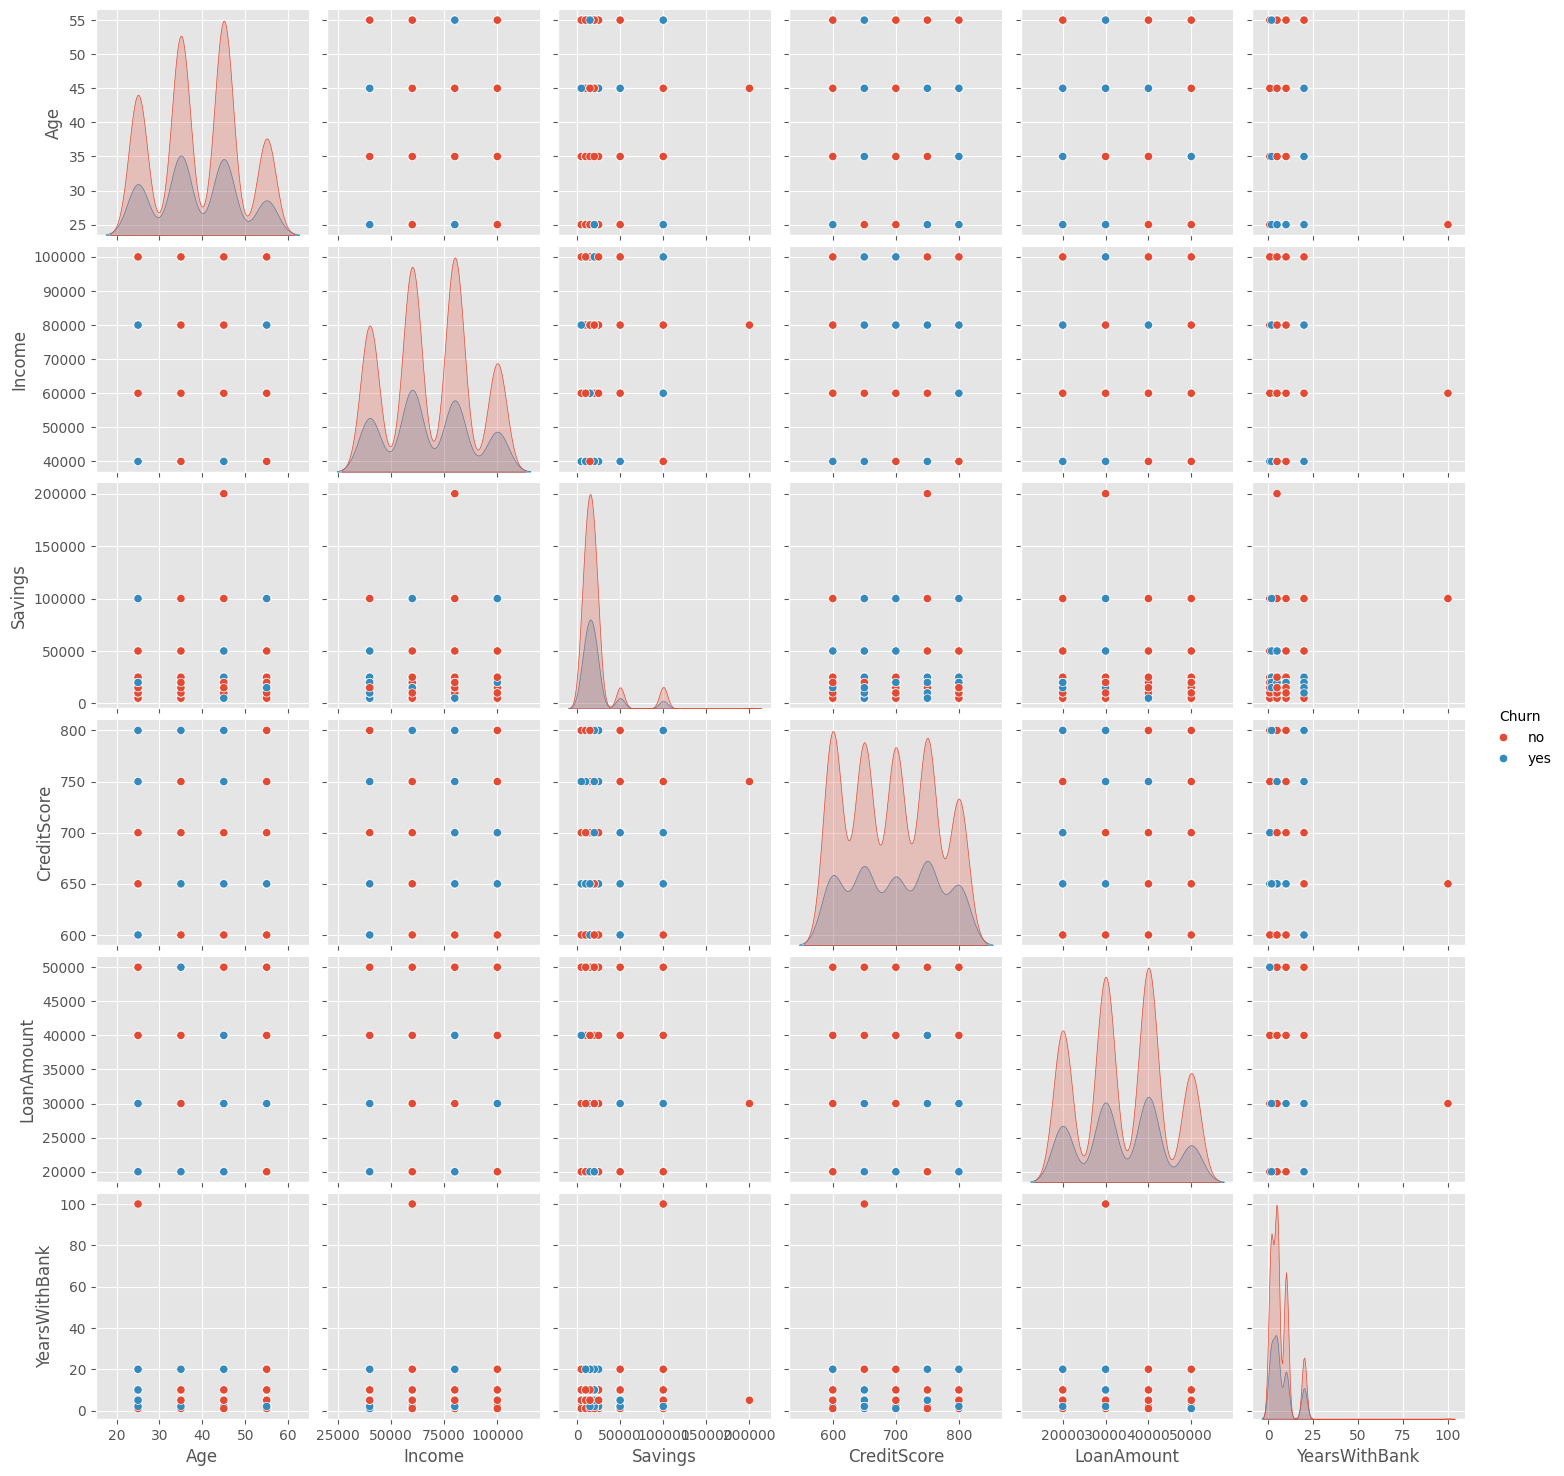

In [367]:
sns.pairplot(df, vars=['Age', 'Income', 'Savings', 'CreditScore', 'LoanAmount', 'YearsWithBank'], hue='Churn')
plt.show()

## Handle duplicates, missing values, outliers, etc.

In [377]:
df2 = df.copy()

In [378]:
# Looking for duplicates
df2.loc[df2.duplicated()]

,CustomerID,Age,Gender,MaritalStatus,Income,Savings,CreditScore,LoanAmount,LoanStatus,AccountType,YearsWithBank,Churn


In [379]:
# Remove duplicates
df2 = df2.loc[~df2.duplicated()].reset_index(drop=True).copy()

#### Handling Missing Values 

In [380]:
df2.isna().sum()

CustomerID         0
Age              162
Gender             0
MaritalStatus      0
Income           135
Savings          146
CreditScore      143
LoanAmount       133
LoanStatus         0
AccountType        0
YearsWithBank    287
Churn              0
dtype: int64

In [381]:
for i in df2.select_dtypes(include="number").columns:
    print(f"{df[i].value_counts()} \n")

Age
45.0    923
35.0    890
25.0    608
55.0    417
Name: count, dtype: int64 

Income
60000.0     895
80000.0     886
40000.0     622
100000.0    462
Name: count, dtype: int64 

Savings
15000.0     760
20000.0     613
10000.0     589
25000.0     309
5000.0      278
50000.0     159
100000.0    145
200000.0      1
Name: count, dtype: int64 

CreditScore
750.0    628
600.0    610
650.0    605
700.0    568
800.0    446
Name: count, dtype: int64 

LoanAmount
40000.0    917
30000.0    871
20000.0    635
50000.0    444
Name: count, dtype: int64 

YearsWithBank
5.0      916
10.0     637
2.0      575
20.0     310
1.0      274
100.0      1
Name: count, dtype: int64 



In [195]:
# I use median imputation since we don't have a normal distribution
for i in ["Age","Income","LoanAmount"]:
    df2[i].fillna(df2[i].median(), inplace=True)

C:\Users\petro\AppData\Local\Temp\ipykernel_6268\2489366094.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[i].fillna(df2[i].median(), inplace=True)
C:\Users\petro\AppData\Local\Temp\ipykernel_6268\2489366094.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [382]:
# I use KNN Imputation for the other columns (Savings,YearsWithBank,CreditScore) because the closest neighbors can propably help to predict what the missing values should be based on relationships. For example a near completed row with same income, year and account type could help to predict savings.
impute = KNNImputer()
df2[df2.select_dtypes(include="number").columns] = impute.fit_transform(df2.select_dtypes(include="number"))

In [383]:
df2.isna().sum()

CustomerID       0
Age              0
Gender           0
MaritalStatus    0
Income           0
Savings          0
CreditScore      0
LoanAmount       0
LoanStatus       0
AccountType      0
YearsWithBank    0
Churn            0
dtype: int64

## Outlier Treatments

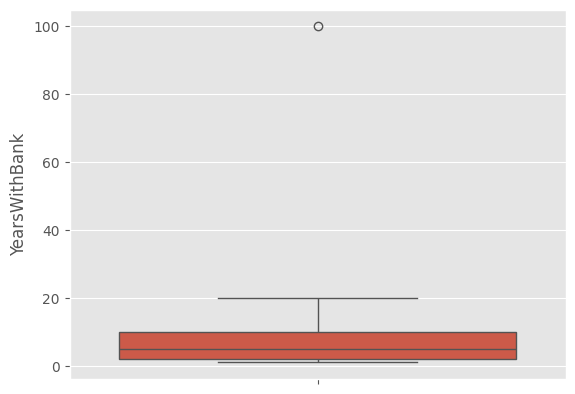

In [384]:
sns.boxplot(y=df2['YearsWithBank'])
plt.show()

In [387]:
df.query("YearsWithBank == 100")

,CustomerID,Age,Gender,MaritalStatus,Income,Savings,CreditScore,LoanAmount,LoanStatus,AccountType,YearsWithBank,Churn
100,C0101,25.0,female,single,60000.0,100000.0,650.0,30000.0,approved,investment,100.0,no


In [388]:
# We can see that we have a row where years with bank is equal to 100. That is propably an outlier due to an error, as it's an extreme number. Therefore, i use statistical methods to confirm it
Q1 = df2['YearsWithBank'].quantile(0.25)
Q3 = df2['YearsWithBank'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df2.loc[(df2['YearsWithBank'] < lower_bound) | (df2['YearsWithBank'] > upper_bound)]
outliers

,CustomerID,Age,Gender,MaritalStatus,Income,Savings,CreditScore,LoanAmount,LoanStatus,AccountType,YearsWithBank,Churn
100,C0101,25.0,female,single,60000.0,100000.0,650.0,30000.0,approved,investment,100.0,no


In [389]:
# Removing the outlier
df2 = df2.drop(df2.query('YearsWithBank == 100.0').index).reset_index(drop = True)

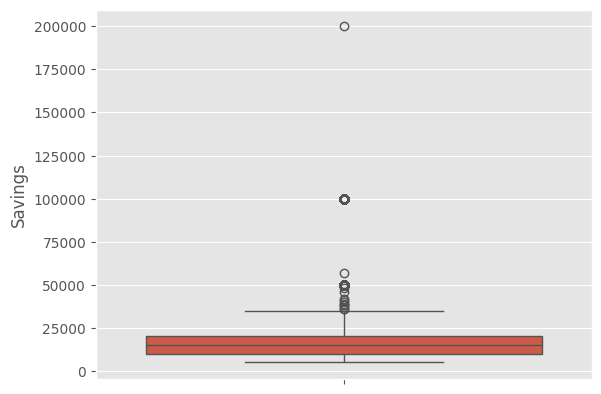

In [393]:
sns.boxplot(y=df2['Savings'])
plt.show()

In [395]:
# Savings seem to have outliers as well. However, these outliers represent legitimate extreme values. Therefore, I don't want to remove them, so i will use capping to decrease these values that might disproportionately influence the model.
lower_percentile = df2['Savings'].quantile(0.05)  # 5th percentile (lower bound)
upper_percentile = df2['Savings'].quantile(0.95)  # 95th percentile (upper bound)

df2['Savings'] = df2['Savings'].clip(lower=lower_percentile, upper=upper_percentile)

## Feature Selection

In [412]:
df3 = df2.copy()
df3.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'Income', 'Savings',
       'CreditScore', 'LoanAmount', 'LoanStatus', 'AccountType',
       'YearsWithBank', 'Churn'],
      dtype='object')

In [413]:
# Removing CustomerID and Gender from the dataframe because i believe that they are not necessary
df3 = df3.drop(columns=['CustomerID', 'Gender'])

In [414]:
df3.columns

Index(['Age', 'Gender', 'MaritalStatus', 'Income', 'Savings', 'CreditScore',
       'LoanAmount', 'LoanStatus', 'AccountType', 'YearsWithBank', 'Churn'],
      dtype='object')

In [415]:
corr_matrix = df2[['Age', 'Income', 'Savings', 'CreditScore', 'LoanAmount', 'YearsWithBank']].corr()
corr_matrix

,Age,Income,Savings,CreditScore,LoanAmount,YearsWithBank
Age,1.000000,0.006406,-0.025987,-0.029447,0.017705,0.025713
Income,0.006406,1.000000,-0.022693,0.023993,0.040529,0.028793
Savings,-0.025987,-0.022693,1.000000,-0.011759,-0.028251,0.013449
CreditScore,-0.029447,0.023993,-0.011759,1.000000,-0.020575,-0.018018
LoanAmount,0.017705,0.040529,-0.028251,-0.020575,1.000000,-0.032906
YearsWithBank,0.025713,0.028793,0.013449,-0.018018,-0.032906,1.000000


In [416]:
for i in df3.select_dtypes(include='object'):
    print(df3[i].value_counts())

Gender
female    888
male      871
FEMALE    632
Male      608
Name: count, dtype: int64
MaritalStatus
single      1215
married     1213
widowed      301
divorced     270
Name: count, dtype: int64
LoanStatus
approved     1792
rejected      920
defaulted     287
Name: count, dtype: int64
AccountType
savings       1236
checking       862
investment     600
joint          301
Name: count, dtype: int64
Churn
no     2093
yes     906
Name: count, dtype: int64


In [417]:
# Removing the target column and keeping only the remaining features
y = df3['Churn']
X = df3.drop(columns=['Churn'])

In [418]:
# One hot encoding for categorical features
X_encoded = pd.get_dummies(X)
X_encoded

,Age,Income,Savings,CreditScore,LoanAmount,YearsWithBank,Gender_FEMALE,Gender_Male,Gender_female,Gender_male,...,MaritalStatus_married,MaritalStatus_single,MaritalStatus_widowed,LoanStatus_approved,LoanStatus_defaulted,LoanStatus_rejected,AccountType_checking,AccountType_investment,AccountType_joint,AccountType_savings
0,25.0,80000.0,15000.0,600.0,50000.0,7.4,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
1,35.0,40000.0,5000.0,700.0,40000.0,10.0,False,False,False,True,...,False,True,False,True,False,False,False,False,True,False
2,35.0,100000.0,20000.0,800.0,50000.0,10.0,False,False,True,False,...,False,True,False,False,True,False,True,False,False,False
3,45.0,80000.0,20000.0,750.0,30000.0,5.6,False,False,False,True,...,True,False,False,True,False,False,True,False,False,False
4,45.0,40000.0,25000.0,750.0,20000.0,2.0,False,False,False,True,...,True,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,35.0,80000.0,21000.0,800.0,30000.0,2.0,False,False,True,False,...,False,True,False,False,False,True,True,False,False,False
2995,35.0,100000.0,25000.0,600.0,40000.0,5.0,False,False,False,True,...,False,True,False,True,False,False,True,False,False,False
2996,45.0,80000.0,5000.0,750.0,40000.0,6.4,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
2997,45.0,80000.0,15000.0,730.0,32000.0,5.0,True,False,False,False,...,True,False,False,True,False,False,False,False,False,True


In [419]:
# Performing Variance Threshold in order to remove features with low variance
selector = VarianceThreshold(0.1)
X_selected = selector.fit_transform(X_encoded)
print(f"Original shape: {X_encoded.shape}")
print(f"Shape after Variance Thresholding: {X_selected.shape}")
print(X_selected)

Original shape: (2999, 21)
Shape after Variance Thresholding: (2999, 17)
[[2.5e+01 8.0e+04 1.5e+04 ... 0.0e+00 0.0e+00 0.0e+00]
 [3.5e+01 4.0e+04 5.0e+03 ... 0.0e+00 0.0e+00 0.0e+00]
 [3.5e+01 1.0e+05 2.0e+04 ... 1.0e+00 0.0e+00 0.0e+00]
 ...
 [4.5e+01 8.0e+04 5.0e+03 ... 0.0e+00 1.0e+00 0.0e+00]
 [4.5e+01 8.0e+04 1.5e+04 ... 0.0e+00 0.0e+00 1.0e+00]
 [3.5e+01 8.0e+04 2.0e+04 ... 0.0e+00 0.0e+00 1.0e+00]]


In [420]:
# Creating new dataframe with the remaining data
X_selected_df = pd.DataFrame(X_selected, columns=X_encoded.columns[selector.get_support()])
X_selected_df

,Age,Income,Savings,CreditScore,LoanAmount,YearsWithBank,Gender_FEMALE,Gender_Male,Gender_female,Gender_male,MaritalStatus_married,MaritalStatus_single,LoanStatus_approved,LoanStatus_rejected,AccountType_checking,AccountType_investment,AccountType_savings
0,25.0,80000.0,15000.0,600.0,50000.0,7.4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,35.0,40000.0,5000.0,700.0,40000.0,10.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,35.0,100000.0,20000.0,800.0,50000.0,10.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,45.0,80000.0,20000.0,750.0,30000.0,5.6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,45.0,40000.0,25000.0,750.0,20000.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,35.0,80000.0,21000.0,800.0,30000.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2995,35.0,100000.0,25000.0,600.0,40000.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2996,45.0,80000.0,5000.0,750.0,40000.0,6.4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2997,45.0,80000.0,15000.0,730.0,32000.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [421]:
# Train Random Forest Regressor
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_selected_df, y)

RandomForestClassifier(random_state=42)

In [422]:
feature_importances = rf.feature_importances_

In [423]:
# Get feature importances
importance_df = pd.DataFrame({'Feature': X_selected_df.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
2,Savings,0.132520
5,YearsWithBank,0.127291
3,CreditScore,0.117805
0,Age,0.102117
4,LoanAmount,0.101812
1,Income,0.099584
10,MaritalStatus_married,0.036468
12,LoanStatus_approved,0.035046
11,MaritalStatus_single,0.033810
16,AccountType_savings,0.031252


In [409]:
# Removing low importance features
selected_features = importance_df[importance_df['Importance'] > 0.05]['Feature']
X_selected_final = X_selected_df[selected_features]
X_selected_final

,Savings,YearsWithBank,CreditScore,Age,Income,LoanAmount
0,15000.0,7.4,600.0,25.0,80000.0,50000.0
1,5000.0,10.0,700.0,35.0,40000.0,40000.0
2,20000.0,10.0,800.0,35.0,100000.0,50000.0
3,20000.0,5.6,750.0,45.0,80000.0,30000.0
4,25000.0,2.0,750.0,45.0,40000.0,20000.0
...,...,...,...,...,...,...
2994,21000.0,2.0,800.0,35.0,80000.0,30000.0
2995,25000.0,5.0,600.0,35.0,100000.0,40000.0
2996,5000.0,6.4,750.0,45.0,80000.0,40000.0
2997,15000.0,5.0,730.0,45.0,80000.0,32000.0


In [410]:
# Train the model with the final df
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_selected_final, y)

RandomForestClassifier(random_state=42)

In [411]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_selected_final.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,Savings,0.212083
1,YearsWithBank,0.192140
2,CreditScore,0.169962
3,Age,0.154353
5,LoanAmount,0.141060
4,Income,0.130403
